In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Final_feature_matrix.csv",low_memory=False)

In [3]:
data.describe()

,Mean,S.D1,Variance,Kurtotis1,Skew1,Entrophy1,Class
count,1.609000e+03,1.609000e+03,1.609000e+03,1609.000000,1609.000000,1609.000000,1609.000000
mean,8.416516e+04,2.796449e+07,1.932236e+16,553.605734,1635.555828,90.995812,3.099441
std,9.593592e+05,2.596125e+08,3.164060e+17,308.297100,617.299229,47.618719,2.892142
min,2.539646e-02,1.536493e+01,1.180405e+02,97.177303,473.262118,0.000000,0.000000
25%,1.058310e+01,5.527463e+03,8.675677e+05,296.816452,1169.432456,47.814485,0.000000
50%,4.326913e+02,1.745248e+05,1.590959e+09,514.674035,1675.216177,97.355193,2.000000
75%,3.595538e+03,1.512572e+06,5.051460e+11,757.691342,2134.096835,125.148516,5.000000
max,2.434822e+07,5.733978e+09,8.220000e+18,1701.273826,3286.372559,277.351334,9.000000


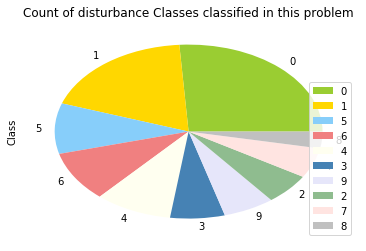

In [4]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
 
#data=pd.read_csv("classifier.csv",low_memory=False)
 
# plot data
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','ivory','steelblue','lavender','DARKSEAGREEN','mistyrose','silver']
data['Class'].value_counts().plot(kind='pie',title='Count of disturbance Classes classified in this problem',colors=colors)
plt.legend(loc='lower right')
plt.show()

In [8]:
Y=data.pop("Class")
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [7]:
X_2d = tsne.fit_transform(data)

In [8]:
target_names=["0","1","2","3","4","5","6","7","8","9"]

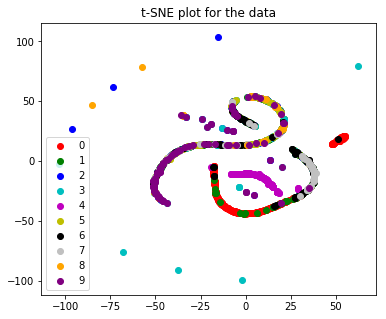

In [9]:
target_ids = range(len(target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'silver', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[Y == i, 0], X_2d[Y == i, 1], c=c, label=label)
plt.legend( loc='lower left')
plt.savefig('t-SNE.fig', format='eps', dpi=1000)
plt.savefig('t-SNE.eps', format='eps', dpi=1000)
plt.title('t-SNE plot for the data')
plt.show()

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [11]:
import datetime
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from numpy import nan

now = datetime.datetime.now

In [12]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

In [13]:
from numpy import argmax
from keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(data, Y, random_state = 42)
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [14]:
print(X_train.shape[0])
print(X_test.shape[0])
dims = X_train.shape[1]
print(dims, 'dims')
print("Building model...")

1206
403
6 dims
Building model...


In [15]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train

#print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
#print('Maximum per feature\n{}'.format(X_train_scaled.max(axis=0)))

X_test_scaled = (X_test - min_train)/range_train

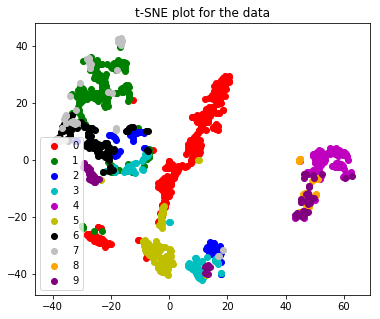

In [18]:
X_2d = tsne.fit_transform(X_train_scaled)
target_names=["0","1","2","3","4","5","6","7","8","9"]
target_ids = range(len(target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'silver', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[y_train == i, 0], X_2d[y_train == i, 1], c=c, label=label)
plt.legend( loc='lower left')
plt.savefig('t-SNE_for_scaled.fig', format='eps', dpi=1000)
plt.savefig('t-SNE_for_scaled.eps', format='eps', dpi=1000)
plt.title('t-SNE plot for the data')
plt.show()

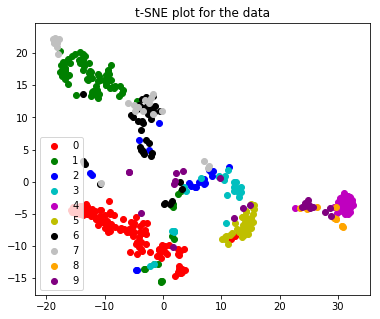

In [19]:
X_2d = tsne.fit_transform(X_test_scaled)
target_names=["0","1","2","3","4","5","6","7","8","9"]
target_ids = range(len(target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'silver', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[y_test == i, 0], X_2d[y_test == i, 1], c=c, label=label)
plt.legend( loc='lower left')
plt.savefig('t-SNE_for_scaled_testdata.fig', format='eps', dpi=1000)
plt.savefig('t-SNE_for_scaled_testdata.eps', format='eps', dpi=1000)
plt.title('t-SNE plot for the data')
plt.show()

In [20]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('relu'))
m.add(Dense(25))
m.add(Activation('softmax'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adam,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist1=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])


Train on 1206 samples, validate on 403 samples
Epoch 1/3000
1206/1206 [==============================] - 2s 2ms/step - loss: 2.2620 - acc: 0.1783 - val_loss: 2.2332 - val_acc: 0.2109
Epoch 2/3000
1206/1206 [==============================] - 0s 71us/step - loss: 2.2252 - acc: 0.1783 - val_loss: 2.1930 - val_acc: 0.2109
Epoch 3/3000
1206/1206 [==============================] - 0s 68us/step - loss: 2.1866 - acc: 0.2098 - val_loss: 2.1474 - val_acc: 0.2928
Epoch 4/3000
1206/1206 [==============================] - 0s 66us/step - loss: 2.1461 - acc: 0.3010 - val_loss: 2.1036 - val_acc: 0.4218
Epoch 5/3000
1206/1206 [==============================] - 0s 66us/step - loss: 2.1096 - acc: 0.2935 - val_loss: 2.0660 - val_acc: 0.2605
Epoch 6/3000
1206/1206 [==============================] - 0s 66us/step - loss: 2.0770 - acc: 0.2612 - val_loss: 2.0372 - val_acc: 0.2605
Epoch 7/3000
1206/1206 [==============================] - 0s 67us/step - loss: 2.0483 - acc: 0.2612 - val_loss: 2.0098 - val_acc: 0.

1206/1206 [==============================] - 0s 86us/step - loss: 1.2109 - acc: 0.5804 - val_loss: 1.1984 - val_acc: 0.5782
Epoch 61/3000
1206/1206 [==============================] - 0s 81us/step - loss: 1.2057 - acc: 0.5779 - val_loss: 1.1937 - val_acc: 0.5757
Epoch 62/3000
1206/1206 [==============================] - 0s 80us/step - loss: 1.2013 - acc: 0.5804 - val_loss: 1.1901 - val_acc: 0.5782
Epoch 63/3000
1206/1206 [==============================] - 0s 57us/step - loss: 1.1966 - acc: 0.5821 - val_loss: 1.1842 - val_acc: 0.5782
Epoch 64/3000
1206/1206 [==============================] - 0s 66us/step - loss: 1.1923 - acc: 0.5887 - val_loss: 1.1806 - val_acc: 0.5831
Epoch 65/3000
1206/1206 [==============================] - 0s 51us/step - loss: 1.1883 - acc: 0.5846 - val_loss: 1.1773 - val_acc: 0.5856
Epoch 66/3000
1206/1206 [==============================] - 0s 66us/step - loss: 1.1834 - acc: 0.5813 - val_loss: 1.1721 - val_acc: 0.5831
Epoch 67/3000
1206/1206 [=======================

1206/1206 [==============================] - 0s 67us/step - loss: 0.9364 - acc: 0.6302 - val_loss: 0.9699 - val_acc: 0.6228
Epoch 179/3000
1206/1206 [==============================] - 0s 69us/step - loss: 0.9344 - acc: 0.6277 - val_loss: 0.9688 - val_acc: 0.6278
Epoch 180/3000
1206/1206 [==============================] - 0s 57us/step - loss: 0.9332 - acc: 0.6285 - val_loss: 0.9659 - val_acc: 0.6228
Epoch 181/3000
1206/1206 [==============================] - 0s 66us/step - loss: 0.9326 - acc: 0.6310 - val_loss: 0.9657 - val_acc: 0.6253
Epoch 182/3000
1206/1206 [==============================] - 0s 64us/step - loss: 0.9322 - acc: 0.6302 - val_loss: 0.9660 - val_acc: 0.6228
Epoch 183/3000
1206/1206 [==============================] - 0s 62us/step - loss: 0.9316 - acc: 0.6335 - val_loss: 0.9745 - val_acc: 0.6253
Epoch 184/3000
1206/1206 [==============================] - 0s 64us/step - loss: 0.9296 - acc: 0.6318 - val_loss: 0.9616 - val_acc: 0.6303
Epoch 185/3000
1206/1206 [================

Epoch 296/3000
1206/1206 [==============================] - 0s 88us/step - loss: 0.8349 - acc: 0.6700 - val_loss: 0.8776 - val_acc: 0.6749
Epoch 297/3000
1206/1206 [==============================] - 0s 90us/step - loss: 0.8343 - acc: 0.6758 - val_loss: 0.8925 - val_acc: 0.6749
Epoch 298/3000
1206/1206 [==============================] - 0s 73us/step - loss: 0.8344 - acc: 0.6750 - val_loss: 0.8800 - val_acc: 0.6749
Epoch 299/3000
1206/1206 [==============================] - 0s 61us/step - loss: 0.8343 - acc: 0.6725 - val_loss: 0.8841 - val_acc: 0.6774
Epoch 300/3000
1206/1206 [==============================] - 0s 50us/step - loss: 0.8326 - acc: 0.6741 - val_loss: 0.8718 - val_acc: 0.6799
Epoch 301/3000
1206/1206 [==============================] - 0s 67us/step - loss: 0.8325 - acc: 0.6766 - val_loss: 0.8880 - val_acc: 0.6749
Epoch 302/3000
1206/1206 [==============================] - 0s 66us/step - loss: 0.8331 - acc: 0.6716 - val_loss: 0.8824 - val_acc: 0.6774
Epoch 303/3000
1206/1206 [=

Epoch 413/3000
1206/1206 [==============================] - 0s 75us/step - loss: 0.6760 - acc: 0.7769 - val_loss: 0.6815 - val_acc: 0.7891
Epoch 414/3000
1206/1206 [==============================] - 0s 109us/step - loss: 0.6743 - acc: 0.7852 - val_loss: 0.6921 - val_acc: 0.7717
Epoch 415/3000
1206/1206 [==============================] - 0s 137us/step - loss: 0.6751 - acc: 0.7745 - val_loss: 0.6815 - val_acc: 0.7891
Epoch 416/3000
1206/1206 [==============================] - 0s 128us/step - loss: 0.6716 - acc: 0.7803 - val_loss: 0.6768 - val_acc: 0.7891
Epoch 417/3000
1206/1206 [==============================] - 0s 120us/step - loss: 0.6705 - acc: 0.7778 - val_loss: 0.6752 - val_acc: 0.7816
Epoch 418/3000
1206/1206 [==============================] - 0s 86us/step - loss: 0.6679 - acc: 0.7819 - val_loss: 0.6730 - val_acc: 0.7965
Epoch 419/3000
1206/1206 [==============================] - 0s 61us/step - loss: 0.6682 - acc: 0.7811 - val_loss: 0.6767 - val_acc: 0.7816
Epoch 420/3000
1206/120

Epoch 472/3000
1206/1206 [==============================] - 0s 35us/step - loss: 0.6168 - acc: 0.7877 - val_loss: 0.6136 - val_acc: 0.8065
Epoch 473/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.6174 - acc: 0.7886 - val_loss: 0.6144 - val_acc: 0.7965
Epoch 474/3000
1206/1206 [==============================] - 0s 38us/step - loss: 0.6174 - acc: 0.7877 - val_loss: 0.6137 - val_acc: 0.8040
Epoch 475/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.6174 - acc: 0.7894 - val_loss: 0.6121 - val_acc: 0.7990
Epoch 476/3000
1206/1206 [==============================] - 0s 53us/step - loss: 0.6160 - acc: 0.7836 - val_loss: 0.6128 - val_acc: 0.8089
Epoch 477/3000
1206/1206 [==============================] - 0s 39us/step - loss: 0.6138 - acc: 0.7869 - val_loss: 0.6126 - val_acc: 0.8015
Epoch 478/3000
1206/1206 [==============================] - 0s 62us/step - loss: 0.6129 - acc: 0.7877 - val_loss: 0.6146 - val_acc: 0.8015
Epoch 479/3000
1206/1206 [=

Epoch 531/3000
1206/1206 [==============================] - 0s 56us/step - loss: 0.5771 - acc: 0.8010 - val_loss: 0.5731 - val_acc: 0.8139
Epoch 532/3000
1206/1206 [==============================] - 0s 59us/step - loss: 0.5753 - acc: 0.8068 - val_loss: 0.5727 - val_acc: 0.8189
Epoch 533/3000
1206/1206 [==============================] - 0s 43us/step - loss: 0.5737 - acc: 0.8035 - val_loss: 0.5737 - val_acc: 0.8213
Epoch 534/3000
1206/1206 [==============================] - 0s 47us/step - loss: 0.5770 - acc: 0.8093 - val_loss: 0.5698 - val_acc: 0.8213
Epoch 535/3000
1206/1206 [==============================] - 0s 65us/step - loss: 0.5740 - acc: 0.8068 - val_loss: 0.5696 - val_acc: 0.8263
Epoch 536/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.5711 - acc: 0.8151 - val_loss: 0.5708 - val_acc: 0.8065
Epoch 537/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.5716 - acc: 0.8085 - val_loss: 0.5707 - val_acc: 0.8189
Epoch 538/3000
1206/1206 [=

Epoch 590/3000
1206/1206 [==============================] - 0s 39us/step - loss: 0.5420 - acc: 0.8201 - val_loss: 0.5449 - val_acc: 0.8263
Epoch 591/3000
1206/1206 [==============================] - 0s 39us/step - loss: 0.5420 - acc: 0.8242 - val_loss: 0.5431 - val_acc: 0.8263
Epoch 592/3000
1206/1206 [==============================] - 0s 39us/step - loss: 0.5468 - acc: 0.8159 - val_loss: 0.5439 - val_acc: 0.8313
Epoch 593/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.5420 - acc: 0.8176 - val_loss: 0.5437 - val_acc: 0.8362
Epoch 594/3000
1206/1206 [==============================] - 0s 39us/step - loss: 0.5395 - acc: 0.8250 - val_loss: 0.5406 - val_acc: 0.8288
Epoch 595/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.5393 - acc: 0.8250 - val_loss: 0.5390 - val_acc: 0.8313
Epoch 596/3000
1206/1206 [==============================] - 0s 39us/step - loss: 0.5409 - acc: 0.8167 - val_loss: 0.5395 - val_acc: 0.8288
Epoch 597/3000
1206/1206 [=

Epoch 649/3000
1206/1206 [==============================] - 0s 63us/step - loss: 0.5167 - acc: 0.8242 - val_loss: 0.5202 - val_acc: 0.8288
Epoch 650/3000
1206/1206 [==============================] - 0s 65us/step - loss: 0.5155 - acc: 0.8300 - val_loss: 0.5218 - val_acc: 0.8412
Epoch 651/3000
1206/1206 [==============================] - 0s 65us/step - loss: 0.5144 - acc: 0.8292 - val_loss: 0.5185 - val_acc: 0.8362
Epoch 652/3000
1206/1206 [==============================] - 0s 80us/step - loss: 0.5163 - acc: 0.8275 - val_loss: 0.5171 - val_acc: 0.8337
Epoch 653/3000
1206/1206 [==============================] - 0s 110us/step - loss: 0.5172 - acc: 0.8317 - val_loss: 0.5174 - val_acc: 0.8337
Epoch 654/3000
1206/1206 [==============================] - 0s 84us/step - loss: 0.5160 - acc: 0.8300 - val_loss: 0.5175 - val_acc: 0.8337
Epoch 655/3000
1206/1206 [==============================] - 0s 85us/step - loss: 0.5134 - acc: 0.8242 - val_loss: 0.5236 - val_acc: 0.8387
Epoch 656/3000
1206/1206 [

Epoch 708/3000
1206/1206 [==============================] - 0s 47us/step - loss: 0.4967 - acc: 0.8325 - val_loss: 0.5121 - val_acc: 0.8337
Epoch 709/3000
1206/1206 [==============================] - 0s 40us/step - loss: 0.4987 - acc: 0.8267 - val_loss: 0.5011 - val_acc: 0.8337
Epoch 710/3000
1206/1206 [==============================] - 0s 55us/step - loss: 0.4937 - acc: 0.8333 - val_loss: 0.5013 - val_acc: 0.8486
Epoch 711/3000
1206/1206 [==============================] - 0s 62us/step - loss: 0.4956 - acc: 0.8292 - val_loss: 0.4998 - val_acc: 0.8437
Epoch 712/3000
1206/1206 [==============================] - 0s 85us/step - loss: 0.4944 - acc: 0.8284 - val_loss: 0.4991 - val_acc: 0.8437
Epoch 713/3000
1206/1206 [==============================] - 0s 70us/step - loss: 0.4934 - acc: 0.8333 - val_loss: 0.5013 - val_acc: 0.8313
Epoch 714/3000
1206/1206 [==============================] - 0s 63us/step - loss: 0.4915 - acc: 0.8284 - val_loss: 0.5004 - val_acc: 0.8462
Epoch 715/3000
1206/1206 [=

Epoch 767/3000
1206/1206 [==============================] - 0s 39us/step - loss: 0.4769 - acc: 0.8333 - val_loss: 0.4861 - val_acc: 0.8511
Epoch 768/3000
1206/1206 [==============================] - 0s 65us/step - loss: 0.4785 - acc: 0.8367 - val_loss: 0.4872 - val_acc: 0.8362
Epoch 769/3000
1206/1206 [==============================] - 0s 39us/step - loss: 0.4793 - acc: 0.8333 - val_loss: 0.4844 - val_acc: 0.8462
Epoch 770/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4778 - acc: 0.8383 - val_loss: 0.4827 - val_acc: 0.8437
Epoch 771/3000
1206/1206 [==============================] - 0s 39us/step - loss: 0.4784 - acc: 0.8383 - val_loss: 0.4876 - val_acc: 0.8536
Epoch 772/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4774 - acc: 0.8367 - val_loss: 0.4831 - val_acc: 0.8362
Epoch 773/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4753 - acc: 0.8358 - val_loss: 0.4851 - val_acc: 0.8511
Epoch 774/3000
1206/1206 [=

Epoch 826/3000
1206/1206 [==============================] - 0s 89us/step - loss: 0.4661 - acc: 0.8317 - val_loss: 0.4725 - val_acc: 0.8486
Epoch 827/3000
1206/1206 [==============================] - 0s 99us/step - loss: 0.4674 - acc: 0.8367 - val_loss: 0.4704 - val_acc: 0.8486
Epoch 828/3000
1206/1206 [==============================] - 0s 71us/step - loss: 0.4661 - acc: 0.8300 - val_loss: 0.4720 - val_acc: 0.8486
Epoch 829/3000
1206/1206 [==============================] - 0s 61us/step - loss: 0.4627 - acc: 0.8383 - val_loss: 0.4761 - val_acc: 0.8412
Epoch 830/3000
1206/1206 [==============================] - 0s 59us/step - loss: 0.4662 - acc: 0.8350 - val_loss: 0.4754 - val_acc: 0.8536
Epoch 831/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4628 - acc: 0.8367 - val_loss: 0.4685 - val_acc: 0.8511
Epoch 832/3000
1206/1206 [==============================] - 0s 39us/step - loss: 0.4622 - acc: 0.8391 - val_loss: 0.4742 - val_acc: 0.8412
Epoch 833/3000
1206/1206 [=

Epoch 885/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4513 - acc: 0.8383 - val_loss: 0.4597 - val_acc: 0.8412
Epoch 886/3000
1206/1206 [==============================] - 0s 47us/step - loss: 0.4514 - acc: 0.8391 - val_loss: 0.4639 - val_acc: 0.8486
Epoch 887/3000
1206/1206 [==============================] - 0s 39us/step - loss: 0.4501 - acc: 0.8383 - val_loss: 0.4591 - val_acc: 0.8412
Epoch 888/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4529 - acc: 0.8367 - val_loss: 0.4638 - val_acc: 0.8412
Epoch 889/3000
1206/1206 [==============================] - 0s 39us/step - loss: 0.4512 - acc: 0.8383 - val_loss: 0.4592 - val_acc: 0.8536
Epoch 890/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4509 - acc: 0.8375 - val_loss: 0.4586 - val_acc: 0.8536
Epoch 891/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4534 - acc: 0.8383 - val_loss: 0.4598 - val_acc: 0.8412
Epoch 892/3000
1206/1206 [=

Epoch 944/3000
1206/1206 [==============================] - 0s 39us/step - loss: 0.4406 - acc: 0.8375 - val_loss: 0.4519 - val_acc: 0.8511
Epoch 945/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4408 - acc: 0.8408 - val_loss: 0.4536 - val_acc: 0.8511
Epoch 946/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4398 - acc: 0.8400 - val_loss: 0.4481 - val_acc: 0.8412
Epoch 947/3000
1206/1206 [==============================] - 0s 39us/step - loss: 0.4384 - acc: 0.8400 - val_loss: 0.4502 - val_acc: 0.8536
Epoch 948/3000
1206/1206 [==============================] - ETA: 0s - loss: 0.5569 - acc: 0.843 - 0s 39us/step - loss: 0.4404 - acc: 0.8391 - val_loss: 0.4478 - val_acc: 0.8536
Epoch 949/3000
1206/1206 [==============================] - 0s 39us/step - loss: 0.4381 - acc: 0.8408 - val_loss: 0.4502 - val_acc: 0.8511
Epoch 950/3000
1206/1206 [==============================] - 0s 39us/step - loss: 0.4388 - acc: 0.8400 - val_loss: 0.4570 - val_a

1206/1206 [==============================] - 0s 52us/step - loss: 0.4272 - acc: 0.8408 - val_loss: 0.4412 - val_acc: 0.8511
Epoch 1061/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4223 - acc: 0.8400 - val_loss: 0.4385 - val_acc: 0.8437
Epoch 1062/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4218 - acc: 0.8449 - val_loss: 0.4343 - val_acc: 0.8536
Epoch 1063/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4222 - acc: 0.8483 - val_loss: 0.4378 - val_acc: 0.8462
Epoch 1064/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4231 - acc: 0.8458 - val_loss: 0.4424 - val_acc: 0.8486
Epoch 1065/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4218 - acc: 0.8433 - val_loss: 0.4325 - val_acc: 0.8387
Epoch 1066/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4235 - acc: 0.8449 - val_loss: 0.4434 - val_acc: 0.8486
Epoch 1067/3000
1206/1206 [=========

1206/1206 [==============================] - 0s 52us/step - loss: 0.4061 - acc: 0.8416 - val_loss: 0.4221 - val_acc: 0.8536
Epoch 1177/3000
1206/1206 [==============================] - 0s 39us/step - loss: 0.4058 - acc: 0.8425 - val_loss: 0.4217 - val_acc: 0.8511
Epoch 1178/3000
1206/1206 [==============================] - 0s 39us/step - loss: 0.4085 - acc: 0.8466 - val_loss: 0.4253 - val_acc: 0.8536
Epoch 1179/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4057 - acc: 0.8441 - val_loss: 0.4234 - val_acc: 0.8412
Epoch 1180/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4076 - acc: 0.8433 - val_loss: 0.4217 - val_acc: 0.8586
Epoch 1181/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4044 - acc: 0.8499 - val_loss: 0.4191 - val_acc: 0.8362
Epoch 1182/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4075 - acc: 0.8449 - val_loss: 0.4235 - val_acc: 0.8462
Epoch 1183/3000
1206/1206 [=========

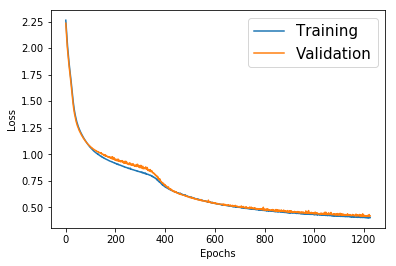

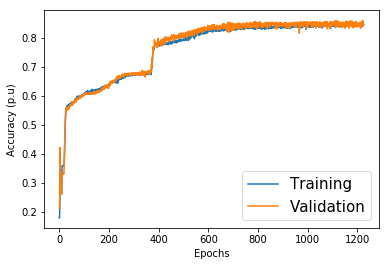

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
plt.savefig('loss with adam.fig', format='eps', dpi=1000)
plt.savefig('loss with adam.eps', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy (p.u)')
plt.plot(hist1.history['acc'])
plt.plot(hist1.history['val_acc'])
plt.savefig('accuracy with adam.fig', format='eps', dpi=1000)
plt.savefig('accuracy with adam.eps', format='eps', dpi=1000)
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})

In [26]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(29, input_shape=(dims,)))
m.add(Activation('softmax'))
m.add(Dense(20))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adam,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=1500, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1206 samples, validate on 403 samples
Epoch 1/1500
1206/1206 [==============================] - 1s 819us/step - loss: 2.2820 - acc: 0.2371 - val_loss: 2.2510 - val_acc: 0.2605
Epoch 2/1500
1206/1206 [==============================] - 0s 90us/step - loss: 2.2341 - acc: 0.2612 - val_loss: 2.1983 - val_acc: 0.2605
Epoch 3/1500
1206/1206 [==============================] - 0s 87us/step - loss: 2.1874 - acc: 0.2612 - val_loss: 2.1485 - val_acc: 0.2605
Epoch 4/1500
1206/1206 [==============================] - 0s 77us/step - loss: 2.1509 - acc: 0.2612 - val_loss: 2.1151 - val_acc: 0.2605
Epoch 5/1500
1206/1206 [==============================] - 0s 75us/step - loss: 2.1304 - acc: 0.2612 - val_loss: 2.0989 - val_acc: 0.2605
Epoch 6/1500
1206/1206 [==============================] - 0s 75us/step - loss: 2.1202 - acc: 0.2612 - val_loss: 2.0899 - val_acc: 0.2605
Epoch 7/1500
1206/1206 [==============================] - 0s 70us/step - loss: 2.1121 - acc: 0.2612 - val_loss: 2.0820 - val_acc: 

1206/1206 [==============================] - 0s 70us/step - loss: 1.2606 - acc: 0.5813 - val_loss: 1.2267 - val_acc: 0.5782
Epoch 61/1500
1206/1206 [==============================] - 0s 65us/step - loss: 1.2534 - acc: 0.5829 - val_loss: 1.2196 - val_acc: 0.5782
Epoch 62/1500
1206/1206 [==============================] - 0s 66us/step - loss: 1.2480 - acc: 0.5821 - val_loss: 1.2138 - val_acc: 0.5757
Epoch 63/1500
1206/1206 [==============================] - 0s 57us/step - loss: 1.2416 - acc: 0.5821 - val_loss: 1.2076 - val_acc: 0.5757
Epoch 64/1500
1206/1206 [==============================] - 0s 72us/step - loss: 1.2354 - acc: 0.5821 - val_loss: 1.2010 - val_acc: 0.5757
Epoch 65/1500
1206/1206 [==============================] - 0s 90us/step - loss: 1.2289 - acc: 0.5821 - val_loss: 1.1944 - val_acc: 0.5782
Epoch 66/1500
1206/1206 [==============================] - 0s 99us/step - loss: 1.2225 - acc: 0.5854 - val_loss: 1.1894 - val_acc: 0.5782
Epoch 67/1500
1206/1206 [=======================

1206/1206 [==============================] - 0s 65us/step - loss: 0.9492 - acc: 0.6841 - val_loss: 0.9354 - val_acc: 0.6948
Epoch 120/1500
1206/1206 [==============================] - 0s 70us/step - loss: 0.9451 - acc: 0.6841 - val_loss: 0.9330 - val_acc: 0.6973
Epoch 121/1500
1206/1206 [==============================] - 0s 63us/step - loss: 0.9418 - acc: 0.6866 - val_loss: 0.9302 - val_acc: 0.6948
Epoch 122/1500
1206/1206 [==============================] - 0s 74us/step - loss: 0.9394 - acc: 0.6833 - val_loss: 0.9275 - val_acc: 0.6923
Epoch 123/1500
1206/1206 [==============================] - 0s 65us/step - loss: 0.9366 - acc: 0.6857 - val_loss: 0.9252 - val_acc: 0.6948
Epoch 124/1500
1206/1206 [==============================] - 0s 66us/step - loss: 0.9327 - acc: 0.6882 - val_loss: 0.9217 - val_acc: 0.6898
Epoch 125/1500
1206/1206 [==============================] - 0s 68us/step - loss: 0.9301 - acc: 0.6907 - val_loss: 0.9199 - val_acc: 0.6948
Epoch 126/1500
1206/1206 [================

1206/1206 [==============================] - 0s 70us/step - loss: 0.8032 - acc: 0.7255 - val_loss: 0.8014 - val_acc: 0.7320
Epoch 179/1500
1206/1206 [==============================] - 0s 65us/step - loss: 0.8013 - acc: 0.7297 - val_loss: 0.7991 - val_acc: 0.7345
Epoch 180/1500
1206/1206 [==============================] - 0s 65us/step - loss: 0.7997 - acc: 0.7305 - val_loss: 0.7979 - val_acc: 0.7295
Epoch 181/1500
1206/1206 [==============================] - 0s 70us/step - loss: 0.7970 - acc: 0.7289 - val_loss: 0.7951 - val_acc: 0.7395
Epoch 182/1500
1206/1206 [==============================] - 0s 67us/step - loss: 0.7941 - acc: 0.7322 - val_loss: 0.7941 - val_acc: 0.7395
Epoch 183/1500
1206/1206 [==============================] - 0s 71us/step - loss: 0.7929 - acc: 0.7297 - val_loss: 0.7919 - val_acc: 0.7395
Epoch 184/1500
1206/1206 [==============================] - 0s 69us/step - loss: 0.7914 - acc: 0.7347 - val_loss: 0.7902 - val_acc: 0.7345
Epoch 185/1500
1206/1206 [================

1206/1206 [==============================] - 0s 76us/step - loss: 0.6803 - acc: 0.7695 - val_loss: 0.6948 - val_acc: 0.7891
Epoch 238/1500
1206/1206 [==============================] - 0s 82us/step - loss: 0.6826 - acc: 0.7836 - val_loss: 0.6941 - val_acc: 0.7841
Epoch 239/1500
1206/1206 [==============================] - 0s 75us/step - loss: 0.6775 - acc: 0.7736 - val_loss: 0.6918 - val_acc: 0.7866
Epoch 240/1500
1206/1206 [==============================] - 0s 65us/step - loss: 0.6766 - acc: 0.7761 - val_loss: 0.6893 - val_acc: 0.7866
Epoch 241/1500
1206/1206 [==============================] - 0s 72us/step - loss: 0.6726 - acc: 0.7786 - val_loss: 0.6877 - val_acc: 0.7891
Epoch 242/1500
1206/1206 [==============================] - 0s 83us/step - loss: 0.6710 - acc: 0.7711 - val_loss: 0.6861 - val_acc: 0.7891
Epoch 243/1500
1206/1206 [==============================] - 0s 79us/step - loss: 0.6705 - acc: 0.7794 - val_loss: 0.6849 - val_acc: 0.7866
Epoch 244/1500
1206/1206 [================

1206/1206 [==============================] - 0s 68us/step - loss: 0.4977 - acc: 0.8151 - val_loss: 0.5341 - val_acc: 0.8288
Epoch 355/1500
1206/1206 [==============================] - 0s 72us/step - loss: 0.4938 - acc: 0.8159 - val_loss: 0.5320 - val_acc: 0.8238
Epoch 356/1500
1206/1206 [==============================] - 0s 68us/step - loss: 0.4926 - acc: 0.8151 - val_loss: 0.5315 - val_acc: 0.8213
Epoch 357/1500
1206/1206 [==============================] - 0s 69us/step - loss: 0.4922 - acc: 0.8109 - val_loss: 0.5299 - val_acc: 0.8238
Epoch 358/1500
1206/1206 [==============================] - 0s 69us/step - loss: 0.4900 - acc: 0.8134 - val_loss: 0.5287 - val_acc: 0.8337
Epoch 359/1500
1206/1206 [==============================] - 0s 69us/step - loss: 0.4880 - acc: 0.8159 - val_loss: 0.5268 - val_acc: 0.8238
Epoch 360/1500
1206/1206 [==============================] - 0s 70us/step - loss: 0.4871 - acc: 0.8143 - val_loss: 0.5259 - val_acc: 0.8213
Epoch 361/1500
1206/1206 [================

Epoch 413/1500
1206/1206 [==============================] - 0s 115us/step - loss: 0.4158 - acc: 0.8557 - val_loss: 0.4610 - val_acc: 0.8462
Epoch 414/1500
1206/1206 [==============================] - 0s 144us/step - loss: 0.4128 - acc: 0.8549 - val_loss: 0.4553 - val_acc: 0.8462
Epoch 415/1500
1206/1206 [==============================] - 0s 149us/step - loss: 0.4113 - acc: 0.8541 - val_loss: 0.4540 - val_acc: 0.8462
Epoch 416/1500
1206/1206 [==============================] - 0s 166us/step - loss: 0.4092 - acc: 0.8640 - val_loss: 0.4560 - val_acc: 0.8486
Epoch 417/1500
1206/1206 [==============================] - 0s 140us/step - loss: 0.4107 - acc: 0.8599 - val_loss: 0.4517 - val_acc: 0.8462
Epoch 418/1500
1206/1206 [==============================] - 0s 132us/step - loss: 0.4088 - acc: 0.8590 - val_loss: 0.4513 - val_acc: 0.8462
Epoch 419/1500
1206/1206 [==============================] - 0s 146us/step - loss: 0.4083 - acc: 0.8599 - val_loss: 0.4494 - val_acc: 0.8437
Epoch 420/1500
1206/

Epoch 530/1500
1206/1206 [==============================] - 0s 76us/step - loss: 0.3209 - acc: 0.8864 - val_loss: 0.3694 - val_acc: 0.8635
Epoch 531/1500
1206/1206 [==============================] - 0s 75us/step - loss: 0.3209 - acc: 0.8831 - val_loss: 0.3666 - val_acc: 0.8586
Epoch 532/1500
1206/1206 [==============================] - 0s 70us/step - loss: 0.3208 - acc: 0.8839 - val_loss: 0.3691 - val_acc: 0.8610
Epoch 533/1500
1206/1206 [==============================] - 0s 74us/step - loss: 0.3224 - acc: 0.8823 - val_loss: 0.3689 - val_acc: 0.8586
Epoch 534/1500
1206/1206 [==============================] - 0s 72us/step - loss: 0.3209 - acc: 0.8773 - val_loss: 0.3671 - val_acc: 0.8660
Epoch 535/1500
1206/1206 [==============================] - 0s 76us/step - loss: 0.3195 - acc: 0.8831 - val_loss: 0.3646 - val_acc: 0.8660
Epoch 536/1500
1206/1206 [==============================] - 0s 76us/step - loss: 0.3197 - acc: 0.8831 - val_loss: 0.3697 - val_acc: 0.8660
Epoch 537/1500
1206/1206 [=

Epoch 647/1500
1206/1206 [==============================] - 0s 105us/step - loss: 0.2877 - acc: 0.8897 - val_loss: 0.3444 - val_acc: 0.8734
Epoch 648/1500
1206/1206 [==============================] - 0s 148us/step - loss: 0.2857 - acc: 0.8889 - val_loss: 0.3351 - val_acc: 0.8635
Epoch 649/1500
1206/1206 [==============================] - 0s 145us/step - loss: 0.2887 - acc: 0.8905 - val_loss: 0.3375 - val_acc: 0.8610
Epoch 650/1500
1206/1206 [==============================] - 0s 151us/step - loss: 0.2864 - acc: 0.8905 - val_loss: 0.3364 - val_acc: 0.8685
Epoch 651/1500
1206/1206 [==============================] - 0s 143us/step - loss: 0.2851 - acc: 0.8930 - val_loss: 0.3363 - val_acc: 0.8710
Epoch 652/1500
1206/1206 [==============================] - 0s 143us/step - loss: 0.2852 - acc: 0.8897 - val_loss: 0.3357 - val_acc: 0.8610
Epoch 653/1500
1206/1206 [==============================] - 0s 153us/step - loss: 0.2856 - acc: 0.8930 - val_loss: 0.3352 - val_acc: 0.8710
Epoch 654/1500
1206/

Epoch 764/1500
1206/1206 [==============================] - 0s 88us/step - loss: 0.2681 - acc: 0.8930 - val_loss: 0.3213 - val_acc: 0.8660
Epoch 765/1500
1206/1206 [==============================] - 0s 65us/step - loss: 0.2667 - acc: 0.8988 - val_loss: 0.3232 - val_acc: 0.8710
Epoch 766/1500
1206/1206 [==============================] - 0s 70us/step - loss: 0.2694 - acc: 0.8955 - val_loss: 0.3209 - val_acc: 0.8685
Epoch 767/1500
1206/1206 [==============================] - 0s 67us/step - loss: 0.2686 - acc: 0.8930 - val_loss: 0.3217 - val_acc: 0.8685
Epoch 768/1500
1206/1206 [==============================] - 0s 75us/step - loss: 0.2661 - acc: 0.8905 - val_loss: 0.3188 - val_acc: 0.8610
Epoch 769/1500
1206/1206 [==============================] - 0s 82us/step - loss: 0.2661 - acc: 0.8947 - val_loss: 0.3216 - val_acc: 0.8710
Epoch 770/1500
1206/1206 [==============================] - 0s 72us/step - loss: 0.2656 - acc: 0.8988 - val_loss: 0.3188 - val_acc: 0.8685
Epoch 771/1500
1206/1206 [=

Epoch 823/1500
1206/1206 [==============================] - 0s 73us/step - loss: 0.2601 - acc: 0.8972 - val_loss: 0.3215 - val_acc: 0.8759
Epoch 824/1500
1206/1206 [==============================] - 0s 69us/step - loss: 0.2611 - acc: 0.8988 - val_loss: 0.3176 - val_acc: 0.8685
Epoch 825/1500
1206/1206 [==============================] - 0s 67us/step - loss: 0.2594 - acc: 0.9046 - val_loss: 0.3169 - val_acc: 0.8685
Epoch 826/1500
1206/1206 [==============================] - 0s 64us/step - loss: 0.2603 - acc: 0.8964 - val_loss: 0.3165 - val_acc: 0.8759
Epoch 827/1500
1206/1206 [==============================] - 0s 67us/step - loss: 0.2596 - acc: 0.8980 - val_loss: 0.3152 - val_acc: 0.8734
Epoch 828/1500
1206/1206 [==============================] - 0s 70us/step - loss: 0.2597 - acc: 0.8972 - val_loss: 0.3171 - val_acc: 0.8685
Epoch 829/1500
1206/1206 [==============================] - 0s 73us/step - loss: 0.2596 - acc: 0.8988 - val_loss: 0.3164 - val_acc: 0.8660
Epoch 830/1500
1206/1206 [=

Epoch 940/1500
1206/1206 [==============================] - 0s 77us/step - loss: 0.2485 - acc: 0.9046 - val_loss: 0.3093 - val_acc: 0.8759
Epoch 941/1500
1206/1206 [==============================] - 0s 59us/step - loss: 0.2486 - acc: 0.8988 - val_loss: 0.3034 - val_acc: 0.8685
Epoch 942/1500
1206/1206 [==============================] - 0s 65us/step - loss: 0.2492 - acc: 0.9022 - val_loss: 0.3067 - val_acc: 0.8734
Epoch 943/1500
1206/1206 [==============================] - 0s 74us/step - loss: 0.2487 - acc: 0.9005 - val_loss: 0.3055 - val_acc: 0.8759
Epoch 944/1500
1206/1206 [==============================] - 0s 75us/step - loss: 0.2487 - acc: 0.8997 - val_loss: 0.3072 - val_acc: 0.8710
Epoch 945/1500
1206/1206 [==============================] - 0s 94us/step - loss: 0.2485 - acc: 0.9055 - val_loss: 0.3077 - val_acc: 0.8784
Epoch 946/1500
1206/1206 [==============================] - 0s 91us/step - loss: 0.2484 - acc: 0.9038 - val_loss: 0.3073 - val_acc: 0.8834
Epoch 947/1500
1206/1206 [=

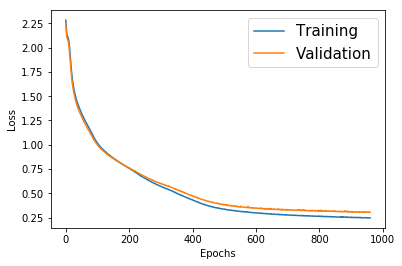

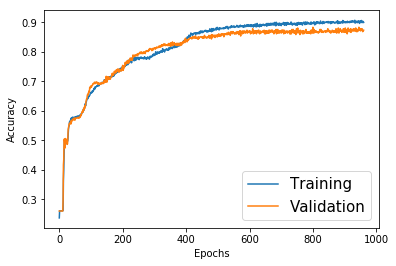

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.savefig('loss with adam(hist).fig', format='eps', dpi=1000)
plt.savefig('loss with adam.eps(hist)', format='eps', dpi=1000)
plt.legend(['Training', 'Validation'], prop={'size': 15})

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.savefig('accuracy with adam(hist).fig', format='eps', dpi=1000)
plt.savefig('accuracy with adam.eps(hist)', format='eps', dpi=1000)
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})

In [58]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(56, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(40))
m.add(Activation('elu'))
m.add(Dense(35))
m.add(Activation('elu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist2=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1206 samples, validate on 403 samples
Epoch 1/3000
1206/1206 [==============================] - 2s 1ms/step - loss: 2.1386 - acc: 0.2413 - val_loss: 1.9746 - val_acc: 0.2605
Epoch 2/3000
1206/1206 [==============================] - 0s 125us/step - loss: 1.9140 - acc: 0.3624 - val_loss: 1.7657 - val_acc: 0.3896
Epoch 3/3000
1206/1206 [==============================] - 0s 118us/step - loss: 1.6428 - acc: 0.4892 - val_loss: 1.5032 - val_acc: 0.5062
Epoch 4/3000
1206/1206 [==============================] - 0s 116us/step - loss: 1.4387 - acc: 0.5265 - val_loss: 1.3401 - val_acc: 0.5385
Epoch 5/3000
1206/1206 [==============================] - 0s 130us/step - loss: 1.3141 - acc: 0.5746 - val_loss: 1.2391 - val_acc: 0.5806
Epoch 6/3000
1206/1206 [==============================] - 0s 124us/step - loss: 1.2215 - acc: 0.6095 - val_loss: 1.1622 - val_acc: 0.6104
Epoch 7/3000
1206/1206 [==============================] - 0s 119us/step - loss: 1.1495 - acc: 0.6393 - val_loss: 1.0853 - val_a

Epoch 118/3000
1206/1206 [==============================] - 0s 99us/step - loss: 0.2313 - acc: 0.9005 - val_loss: 0.2620 - val_acc: 0.9082
Epoch 119/3000
1206/1206 [==============================] - 0s 95us/step - loss: 0.2300 - acc: 0.9071 - val_loss: 0.2602 - val_acc: 0.9032
Epoch 120/3000
1206/1206 [==============================] - 0s 108us/step - loss: 0.2283 - acc: 0.9121 - val_loss: 0.2942 - val_acc: 0.8834
Epoch 121/3000
1206/1206 [==============================] - 0s 95us/step - loss: 0.2395 - acc: 0.9030 - val_loss: 0.2625 - val_acc: 0.8933
Epoch 122/3000
1206/1206 [==============================] - 0s 110us/step - loss: 0.2390 - acc: 0.9088 - val_loss: 0.2591 - val_acc: 0.9007
Epoch 123/3000
1206/1206 [==============================] - 0s 111us/step - loss: 0.2435 - acc: 0.8914 - val_loss: 0.2863 - val_acc: 0.8983
Epoch 124/3000
1206/1206 [==============================] - 0s 100us/step - loss: 0.2370 - acc: 0.8980 - val_loss: 0.2591 - val_acc: 0.8983
Epoch 125/3000
1206/120

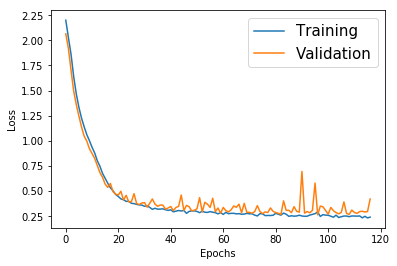

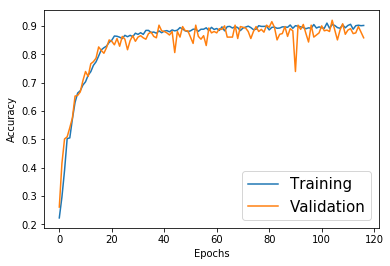

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
plt.savefig('loss with adam(hist2).fig', format='eps', dpi=1000)
plt.savefig('loss with adam.eps(hist2)', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist2.history['acc'])
plt.plot(hist2.history['val_acc'])
plt.savefig('accuracy with adam(hist2).fig', format='eps', dpi=1000)
plt.savefig('accuracy with adam.eps(hist2)', format='eps', dpi=1000)
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})

In [30]:
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 39)                273       
_________________________________________________________________
activation_16 (Activation)   (None, 39)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 25)                1000      
_________________________________________________________________
activation_17 (Activation)   (None, 25)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                260       
_________________________________________________________________
activation_18 (Activation)   (None, 10)                0         
Total params: 1,533
Trainable params: 1,533
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=rmsp,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist3=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1206 samples, validate on 403 samples
Epoch 1/3000
1206/1206 [==============================] - 1s 639us/step - loss: 2.1807 - acc: 0.2488 - val_loss: 2.0712 - val_acc: 0.2605
Epoch 2/3000
1206/1206 [==============================] - 0s 81us/step - loss: 2.0367 - acc: 0.2620 - val_loss: 1.9480 - val_acc: 0.2605
Epoch 3/3000
1206/1206 [==============================] - 0s 96us/step - loss: 1.9453 - acc: 0.2894 - val_loss: 1.8651 - val_acc: 0.2630
Epoch 4/3000
1206/1206 [==============================] - 0s 109us/step - loss: 1.8656 - acc: 0.3574 - val_loss: 1.7783 - val_acc: 0.4045
Epoch 5/3000
1206/1206 [==============================] - 0s 90us/step - loss: 1.7829 - acc: 0.4080 - val_loss: 1.6926 - val_acc: 0.4690
Epoch 6/3000
1206/1206 [==============================] - 0s 86us/step - loss: 1.6983 - acc: 0.5041 - val_loss: 1.6153 - val_acc: 0.5236
Epoch 7/3000
1206/1206 [==============================] - 0s 93us/step - loss: 1.6186 - acc: 0.5257 - val_loss: 1.5377 - val_acc:

Epoch 60/3000
1206/1206 [==============================] - 0s 64us/step - loss: 0.4401 - acc: 0.8516 - val_loss: 0.4718 - val_acc: 0.8362
Epoch 61/3000
1206/1206 [==============================] - 0s 43us/step - loss: 0.4334 - acc: 0.8516 - val_loss: 0.4618 - val_acc: 0.8486
Epoch 62/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4278 - acc: 0.8541 - val_loss: 0.4645 - val_acc: 0.8362
Epoch 63/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4219 - acc: 0.8566 - val_loss: 0.4542 - val_acc: 0.8462
Epoch 64/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4154 - acc: 0.8648 - val_loss: 0.4461 - val_acc: 0.8561
Epoch 65/3000
1206/1206 [==============================] - 0s 39us/step - loss: 0.4098 - acc: 0.8665 - val_loss: 0.4466 - val_acc: 0.8536
Epoch 66/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4052 - acc: 0.8582 - val_loss: 0.4453 - val_acc: 0.8536
Epoch 67/3000
1206/1206 [=========

1206/1206 [==============================] - 0s 88us/step - loss: 0.2481 - acc: 0.9121 - val_loss: 0.3058 - val_acc: 0.8834
Epoch 179/3000
1206/1206 [==============================] - 0s 77us/step - loss: 0.2490 - acc: 0.9063 - val_loss: 0.2971 - val_acc: 0.8908
Epoch 180/3000
1206/1206 [==============================] - 0s 72us/step - loss: 0.2455 - acc: 0.9080 - val_loss: 0.2966 - val_acc: 0.8983
Epoch 181/3000
1206/1206 [==============================] - 0s 87us/step - loss: 0.2484 - acc: 0.9104 - val_loss: 0.3017 - val_acc: 0.8883
Epoch 182/3000
1206/1206 [==============================] - 0s 77us/step - loss: 0.2478 - acc: 0.9038 - val_loss: 0.2975 - val_acc: 0.8933
Epoch 183/3000
1206/1206 [==============================] - 0s 77us/step - loss: 0.2446 - acc: 0.9154 - val_loss: 0.3029 - val_acc: 0.8883
Epoch 184/3000
1206/1206 [==============================] - 0s 79us/step - loss: 0.2473 - acc: 0.9088 - val_loss: 0.3070 - val_acc: 0.8883
Epoch 185/3000
1206/1206 [================

1206/1206 [==============================] - 0s 79us/step - loss: 0.2258 - acc: 0.9080 - val_loss: 0.2839 - val_acc: 0.8983
Epoch 238/3000
1206/1206 [==============================] - 0s 80us/step - loss: 0.2261 - acc: 0.9163 - val_loss: 0.2906 - val_acc: 0.8958
Epoch 239/3000
1206/1206 [==============================] - 0s 79us/step - loss: 0.2248 - acc: 0.9121 - val_loss: 0.2882 - val_acc: 0.8983
Epoch 240/3000
1206/1206 [==============================] - 0s 101us/step - loss: 0.2245 - acc: 0.9204 - val_loss: 0.2934 - val_acc: 0.8933
Epoch 241/3000
1206/1206 [==============================] - 0s 96us/step - loss: 0.2271 - acc: 0.9121 - val_loss: 0.2918 - val_acc: 0.8933
Epoch 242/3000
1206/1206 [==============================] - 0s 94us/step - loss: 0.2256 - acc: 0.9129 - val_loss: 0.2879 - val_acc: 0.8958
Epoch 243/3000
1206/1206 [==============================] - 0s 90us/step - loss: 0.2221 - acc: 0.9163 - val_loss: 0.2892 - val_acc: 0.8958
Epoch 244/3000
1206/1206 [===============

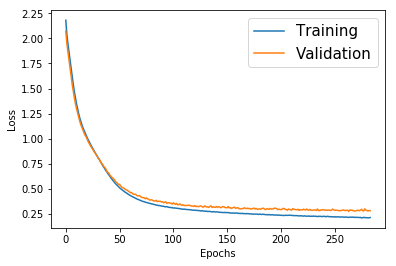

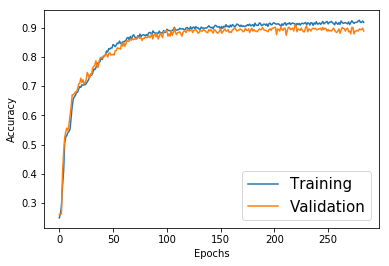

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
plt.savefig('loss with adam(hist3).fig', format='eps', dpi=1000)
plt.savefig('loss with adam.eps(hist3)', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist3.history['acc'])
plt.plot(hist3.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})
plt.savefig('accuracy with adam(hist3).fig', format='eps', dpi=1000)
plt.savefig('accuracy with adam.eps(hist3)', format='eps', dpi=1000)

In [33]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adagrad,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist4=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1206 samples, validate on 403 samples
Epoch 1/3000
1206/1206 [==============================] - 1s 649us/step - loss: 2.0669 - acc: 0.2579 - val_loss: 1.9395 - val_acc: 0.2630
Epoch 2/3000
1206/1206 [==============================] - 0s 86us/step - loss: 1.9123 - acc: 0.3167 - val_loss: 1.8277 - val_acc: 0.4442
Epoch 3/3000
1206/1206 [==============================] - 0s 91us/step - loss: 1.7915 - acc: 0.4726 - val_loss: 1.7091 - val_acc: 0.4938
Epoch 4/3000
1206/1206 [==============================] - 0s 76us/step - loss: 1.6705 - acc: 0.4975 - val_loss: 1.6104 - val_acc: 0.5062
Epoch 5/3000
1206/1206 [==============================] - 0s 80us/step - loss: 1.5788 - acc: 0.5008 - val_loss: 1.5339 - val_acc: 0.5037
Epoch 6/3000
1206/1206 [==============================] - 0s 82us/step - loss: 1.5063 - acc: 0.4967 - val_loss: 1.4750 - val_acc: 0.5112
Epoch 7/3000
1206/1206 [==============================] - 0s 80us/step - loss: 1.4506 - acc: 0.5058 - val_loss: 1.4218 - val_acc: 

Epoch 60/3000
1206/1206 [==============================] - 0s 39us/step - loss: 0.9170 - acc: 0.7040 - val_loss: 0.8975 - val_acc: 0.7395
Epoch 61/3000
1206/1206 [==============================] - 0s 45us/step - loss: 0.9131 - acc: 0.7098 - val_loss: 0.8939 - val_acc: 0.7444
Epoch 62/3000
1206/1206 [==============================] - 0s 70us/step - loss: 0.9100 - acc: 0.7123 - val_loss: 0.8902 - val_acc: 0.7419
Epoch 63/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.9061 - acc: 0.7114 - val_loss: 0.8868 - val_acc: 0.7419
Epoch 64/3000
1206/1206 [==============================] - 0s 75us/step - loss: 0.9023 - acc: 0.7098 - val_loss: 0.8837 - val_acc: 0.7370
Epoch 65/3000
1206/1206 [==============================] - 0s 61us/step - loss: 0.8990 - acc: 0.7106 - val_loss: 0.8808 - val_acc: 0.7370
Epoch 66/3000
1206/1206 [==============================] - 0s 69us/step - loss: 0.8956 - acc: 0.7164 - val_loss: 0.8769 - val_acc: 0.7395
Epoch 67/3000
1206/1206 [=========

Epoch 178/3000
1206/1206 [==============================] - 0s 129us/step - loss: 0.6149 - acc: 0.7886 - val_loss: 0.6154 - val_acc: 0.7965
Epoch 179/3000
1206/1206 [==============================] - 0s 143us/step - loss: 0.6130 - acc: 0.7902 - val_loss: 0.6139 - val_acc: 0.7965
Epoch 180/3000
1206/1206 [==============================] - 0s 133us/step - loss: 0.6112 - acc: 0.7910 - val_loss: 0.6126 - val_acc: 0.7965
Epoch 181/3000
1206/1206 [==============================] - 0s 149us/step - loss: 0.6096 - acc: 0.7894 - val_loss: 0.6105 - val_acc: 0.7990
Epoch 182/3000
1206/1206 [==============================] - 0s 136us/step - loss: 0.6077 - acc: 0.7952 - val_loss: 0.6092 - val_acc: 0.7990
Epoch 183/3000
1206/1206 [==============================] - 0s 131us/step - loss: 0.6062 - acc: 0.7944 - val_loss: 0.6075 - val_acc: 0.7990
Epoch 184/3000
1206/1206 [==============================] - 0s 124us/step - loss: 0.6048 - acc: 0.7910 - val_loss: 0.6059 - val_acc: 0.8040
Epoch 185/3000
1206/

Epoch 295/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4755 - acc: 0.8466 - val_loss: 0.4905 - val_acc: 0.8362
Epoch 296/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4750 - acc: 0.8483 - val_loss: 0.4899 - val_acc: 0.8387
Epoch 297/3000
1206/1206 [==============================] - 0s 52us/step - loss: 0.4740 - acc: 0.8466 - val_loss: 0.4895 - val_acc: 0.8362
Epoch 298/3000
1206/1206 [==============================] - 0s 64us/step - loss: 0.4731 - acc: 0.8466 - val_loss: 0.4890 - val_acc: 0.8362
Epoch 299/3000
1206/1206 [==============================] - 0s 64us/step - loss: 0.4722 - acc: 0.8458 - val_loss: 0.4876 - val_acc: 0.8387
Epoch 300/3000
1206/1206 [==============================] - 0s 57us/step - loss: 0.4715 - acc: 0.8491 - val_loss: 0.4873 - val_acc: 0.8387
Epoch 301/3000
1206/1206 [==============================] - 0s 41us/step - loss: 0.4707 - acc: 0.8491 - val_loss: 0.4862 - val_acc: 0.8412
Epoch 302/3000
1206/1206 [=

1206/1206 [==============================] - 0s 79us/step - loss: 0.4101 - acc: 0.8590 - val_loss: 0.4334 - val_acc: 0.8462
Epoch 413/3000
1206/1206 [==============================] - 0s 80us/step - loss: 0.4097 - acc: 0.8624 - val_loss: 0.4335 - val_acc: 0.8462
Epoch 414/3000
1206/1206 [==============================] - 0s 76us/step - loss: 0.4094 - acc: 0.8632 - val_loss: 0.4333 - val_acc: 0.8462
Epoch 415/3000
1206/1206 [==============================] - 0s 71us/step - loss: 0.4091 - acc: 0.8590 - val_loss: 0.4325 - val_acc: 0.8462
Epoch 416/3000
1206/1206 [==============================] - 0s 73us/step - loss: 0.4086 - acc: 0.8615 - val_loss: 0.4319 - val_acc: 0.8486
Epoch 417/3000
1206/1206 [==============================] - 0s 71us/step - loss: 0.4084 - acc: 0.8615 - val_loss: 0.4318 - val_acc: 0.8486
Epoch 418/3000
1206/1206 [==============================] - 0s 66us/step - loss: 0.4079 - acc: 0.8607 - val_loss: 0.4316 - val_acc: 0.8462
Epoch 419/3000
1206/1206 [================

Epoch 471/3000
1206/1206 [==============================] - 0s 78us/step - loss: 0.3908 - acc: 0.8673 - val_loss: 0.4164 - val_acc: 0.8486
Epoch 472/3000
1206/1206 [==============================] - 0s 70us/step - loss: 0.3905 - acc: 0.8665 - val_loss: 0.4162 - val_acc: 0.8511
Epoch 473/3000
1206/1206 [==============================] - 0s 68us/step - loss: 0.3903 - acc: 0.8640 - val_loss: 0.4166 - val_acc: 0.8462
Epoch 474/3000
1206/1206 [==============================] - 0s 79us/step - loss: 0.3902 - acc: 0.8640 - val_loss: 0.4159 - val_acc: 0.8486
Epoch 475/3000
1206/1206 [==============================] - 0s 72us/step - loss: 0.3897 - acc: 0.8648 - val_loss: 0.4158 - val_acc: 0.8486
Epoch 476/3000
1206/1206 [==============================] - 0s 76us/step - loss: 0.3895 - acc: 0.8665 - val_loss: 0.4158 - val_acc: 0.8486
Epoch 477/3000
1206/1206 [==============================] - 0s 82us/step - loss: 0.3893 - acc: 0.8648 - val_loss: 0.4155 - val_acc: 0.8511
Epoch 478/3000
1206/1206 [=

1206/1206 [==============================] - 0s 74us/step - loss: 0.3629 - acc: 0.8706 - val_loss: 0.3914 - val_acc: 0.8536
Epoch 589/3000
1206/1206 [==============================] - 0s 74us/step - loss: 0.3624 - acc: 0.8698 - val_loss: 0.3912 - val_acc: 0.8586
Epoch 590/3000
1206/1206 [==============================] - 0s 72us/step - loss: 0.3624 - acc: 0.8706 - val_loss: 0.3912 - val_acc: 0.8536
Epoch 591/3000
1206/1206 [==============================] - 0s 72us/step - loss: 0.3623 - acc: 0.8715 - val_loss: 0.3909 - val_acc: 0.8536
Epoch 592/3000
1206/1206 [==============================] - 0s 73us/step - loss: 0.3620 - acc: 0.8723 - val_loss: 0.3909 - val_acc: 0.8536
Epoch 593/3000
1206/1206 [==============================] - 0s 72us/step - loss: 0.3617 - acc: 0.8715 - val_loss: 0.3904 - val_acc: 0.8561
Epoch 594/3000
1206/1206 [==============================] - 0s 77us/step - loss: 0.3616 - acc: 0.8706 - val_loss: 0.3903 - val_acc: 0.8536
Epoch 595/3000
1206/1206 [================

1206/1206 [==============================] - 0s 75us/step - loss: 0.3415 - acc: 0.8765 - val_loss: 0.3745 - val_acc: 0.8561
Epoch 706/3000
1206/1206 [==============================] - 0s 79us/step - loss: 0.3416 - acc: 0.8756 - val_loss: 0.3744 - val_acc: 0.8536
Epoch 707/3000
1206/1206 [==============================] - 0s 82us/step - loss: 0.3414 - acc: 0.8756 - val_loss: 0.3741 - val_acc: 0.8561
Epoch 708/3000
1206/1206 [==============================] - 0s 80us/step - loss: 0.3413 - acc: 0.8731 - val_loss: 0.3742 - val_acc: 0.8561
Epoch 709/3000
1206/1206 [==============================] - 0s 75us/step - loss: 0.3411 - acc: 0.8756 - val_loss: 0.3739 - val_acc: 0.8561
Epoch 710/3000
1206/1206 [==============================] - 0s 68us/step - loss: 0.3409 - acc: 0.8756 - val_loss: 0.3738 - val_acc: 0.8561
Epoch 711/3000
1206/1206 [==============================] - 0s 75us/step - loss: 0.3407 - acc: 0.8748 - val_loss: 0.3733 - val_acc: 0.8536
Epoch 712/3000
1206/1206 [================

Epoch 822/3000
1206/1206 [==============================] - 0s 76us/step - loss: 0.3257 - acc: 0.8798 - val_loss: 0.3602 - val_acc: 0.8586
Epoch 823/3000
1206/1206 [==============================] - 0s 80us/step - loss: 0.3256 - acc: 0.8806 - val_loss: 0.3600 - val_acc: 0.8586
Epoch 824/3000
1206/1206 [==============================] - 0s 81us/step - loss: 0.3256 - acc: 0.8798 - val_loss: 0.3601 - val_acc: 0.8586
Epoch 825/3000
1206/1206 [==============================] - ETA: 0s - loss: 0.3368 - acc: 0.872 - 0s 85us/step - loss: 0.3255 - acc: 0.8806 - val_loss: 0.3600 - val_acc: 0.8610
Epoch 826/3000
1206/1206 [==============================] - 0s 75us/step - loss: 0.3254 - acc: 0.8798 - val_loss: 0.3599 - val_acc: 0.8610
Epoch 827/3000
1206/1206 [==============================] - 0s 71us/step - loss: 0.3251 - acc: 0.8798 - val_loss: 0.3597 - val_acc: 0.8610
Epoch 828/3000
1206/1206 [==============================] - 0s 76us/step - loss: 0.3250 - acc: 0.8798 - val_loss: 0.3596 - val_a

Epoch 939/3000
1206/1206 [==============================] - 0s 75us/step - loss: 0.3133 - acc: 0.8872 - val_loss: 0.3499 - val_acc: 0.8660
Epoch 940/3000
1206/1206 [==============================] - 0s 76us/step - loss: 0.3134 - acc: 0.8881 - val_loss: 0.3499 - val_acc: 0.8660
Epoch 941/3000
1206/1206 [==============================] - 0s 90us/step - loss: 0.3132 - acc: 0.8872 - val_loss: 0.3498 - val_acc: 0.8635
Epoch 942/3000
1206/1206 [==============================] - 0s 77us/step - loss: 0.3131 - acc: 0.8856 - val_loss: 0.3494 - val_acc: 0.8660
Epoch 943/3000
1206/1206 [==============================] - 0s 76us/step - loss: 0.3129 - acc: 0.8856 - val_loss: 0.3493 - val_acc: 0.8660
Epoch 944/3000
1206/1206 [==============================] - 0s 67us/step - loss: 0.3129 - acc: 0.8864 - val_loss: 0.3492 - val_acc: 0.8635
Epoch 945/3000
1206/1206 [==============================] - 0s 71us/step - loss: 0.3128 - acc: 0.8831 - val_loss: 0.3492 - val_acc: 0.8635
Epoch 946/3000
1206/1206 [=

Epoch 998/3000
1206/1206 [==============================] - 0s 75us/step - loss: 0.3081 - acc: 0.8856 - val_loss: 0.3458 - val_acc: 0.8784
Epoch 999/3000
1206/1206 [==============================] - 0s 70us/step - loss: 0.3080 - acc: 0.8872 - val_loss: 0.3455 - val_acc: 0.8784
Epoch 1000/3000
1206/1206 [==============================] - 0s 70us/step - loss: 0.3078 - acc: 0.8847 - val_loss: 0.3454 - val_acc: 0.8809
Epoch 1001/3000
1206/1206 [==============================] - 0s 72us/step - loss: 0.3077 - acc: 0.8864 - val_loss: 0.3452 - val_acc: 0.8784
Epoch 1002/3000
1206/1206 [==============================] - 0s 73us/step - loss: 0.3076 - acc: 0.8856 - val_loss: 0.3453 - val_acc: 0.8784
Epoch 1003/3000
1206/1206 [==============================] - 0s 69us/step - loss: 0.3076 - acc: 0.8856 - val_loss: 0.3453 - val_acc: 0.8784
Epoch 1004/3000
1206/1206 [==============================] - 0s 74us/step - loss: 0.3076 - acc: 0.8839 - val_loss: 0.3451 - val_acc: 0.8784
Epoch 1005/3000
1206/1

1206/1206 [==============================] - 0s 90us/step - loss: 0.2992 - acc: 0.8881 - val_loss: 0.3379 - val_acc: 0.8809
Epoch 1115/3000
1206/1206 [==============================] - 0s 78us/step - loss: 0.2991 - acc: 0.8881 - val_loss: 0.3380 - val_acc: 0.8809
Epoch 1116/3000
1206/1206 [==============================] - 0s 71us/step - loss: 0.2989 - acc: 0.8881 - val_loss: 0.3380 - val_acc: 0.8809
Epoch 1117/3000
1206/1206 [==============================] - 0s 70us/step - loss: 0.2988 - acc: 0.8889 - val_loss: 0.3381 - val_acc: 0.8809
Epoch 1118/3000
1206/1206 [==============================] - 0s 71us/step - loss: 0.2988 - acc: 0.8897 - val_loss: 0.3380 - val_acc: 0.8809
Epoch 1119/3000
1206/1206 [==============================] - 0s 75us/step - loss: 0.2988 - acc: 0.8881 - val_loss: 0.3378 - val_acc: 0.8809
Epoch 1120/3000
1206/1206 [==============================] - 0s 72us/step - loss: 0.2986 - acc: 0.8872 - val_loss: 0.3379 - val_acc: 0.8809
Epoch 1121/3000
1206/1206 [=========

1206/1206 [==============================] - 0s 99us/step - loss: 0.2913 - acc: 0.8939 - val_loss: 0.3319 - val_acc: 0.8784
Epoch 1231/3000
1206/1206 [==============================] - 0s 91us/step - loss: 0.2913 - acc: 0.8930 - val_loss: 0.3317 - val_acc: 0.8784
Epoch 1232/3000
1206/1206 [==============================] - 0s 76us/step - loss: 0.2912 - acc: 0.8947 - val_loss: 0.3316 - val_acc: 0.8784
Epoch 1233/3000
1206/1206 [==============================] - 0s 69us/step - loss: 0.2912 - acc: 0.8947 - val_loss: 0.3317 - val_acc: 0.8784
Epoch 1234/3000
1206/1206 [==============================] - 0s 75us/step - loss: 0.2911 - acc: 0.8955 - val_loss: 0.3318 - val_acc: 0.8784
Epoch 1235/3000
1206/1206 [==============================] - 0s 71us/step - loss: 0.2911 - acc: 0.8939 - val_loss: 0.3316 - val_acc: 0.8784
Epoch 1236/3000
1206/1206 [==============================] - 0s 72us/step - loss: 0.2910 - acc: 0.8955 - val_loss: 0.3316 - val_acc: 0.8784
Epoch 1237/3000
1206/1206 [=========

1206/1206 [==============================] - 0s 79us/step - loss: 0.2849 - acc: 0.8964 - val_loss: 0.3263 - val_acc: 0.8784
Epoch 1347/3000
1206/1206 [==============================] - 0s 96us/step - loss: 0.2849 - acc: 0.8955 - val_loss: 0.3263 - val_acc: 0.8784
Epoch 1348/3000
1206/1206 [==============================] - 0s 88us/step - loss: 0.2849 - acc: 0.8947 - val_loss: 0.3262 - val_acc: 0.8784
Epoch 1349/3000
1206/1206 [==============================] - 0s 75us/step - loss: 0.2848 - acc: 0.8955 - val_loss: 0.3261 - val_acc: 0.8809
Epoch 1350/3000
1206/1206 [==============================] - 0s 76us/step - loss: 0.2847 - acc: 0.8955 - val_loss: 0.3261 - val_acc: 0.8834
Epoch 1351/3000
1206/1206 [==============================] - 0s 77us/step - loss: 0.2846 - acc: 0.8972 - val_loss: 0.3260 - val_acc: 0.8834
Epoch 1352/3000
1206/1206 [==============================] - 0s 74us/step - loss: 0.2846 - acc: 0.8964 - val_loss: 0.3259 - val_acc: 0.8834
Epoch 1353/3000
1206/1206 [=========

1206/1206 [==============================] - 0s 77us/step - loss: 0.2793 - acc: 0.8997 - val_loss: 0.3212 - val_acc: 0.8834
Epoch 1463/3000
1206/1206 [==============================] - 0s 70us/step - loss: 0.2794 - acc: 0.8988 - val_loss: 0.3212 - val_acc: 0.8834
Epoch 1464/3000
1206/1206 [==============================] - 0s 81us/step - loss: 0.2792 - acc: 0.8988 - val_loss: 0.3211 - val_acc: 0.8834
Epoch 1465/3000
1206/1206 [==============================] - 0s 83us/step - loss: 0.2792 - acc: 0.8997 - val_loss: 0.3211 - val_acc: 0.8834
Epoch 1466/3000
1206/1206 [==============================] - 0s 93us/step - loss: 0.2792 - acc: 0.9005 - val_loss: 0.3211 - val_acc: 0.8834
Epoch 1467/3000
1206/1206 [==============================] - 0s 81us/step - loss: 0.2791 - acc: 0.8997 - val_loss: 0.3210 - val_acc: 0.8834
Epoch 1468/3000
1206/1206 [==============================] - 0s 85us/step - loss: 0.2791 - acc: 0.8997 - val_loss: 0.3210 - val_acc: 0.8834
Epoch 1469/3000
1206/1206 [=========

1206/1206 [==============================] - 0s 83us/step - loss: 0.2745 - acc: 0.9005 - val_loss: 0.3168 - val_acc: 0.8834
Epoch 1579/3000
1206/1206 [==============================] - 0s 80us/step - loss: 0.2744 - acc: 0.9005 - val_loss: 0.3167 - val_acc: 0.8834
Epoch 1580/3000
1206/1206 [==============================] - 0s 89us/step - loss: 0.2743 - acc: 0.9005 - val_loss: 0.3167 - val_acc: 0.8834
Epoch 1581/3000
1206/1206 [==============================] - 0s 88us/step - loss: 0.2743 - acc: 0.8997 - val_loss: 0.3166 - val_acc: 0.8834
Epoch 1582/3000
1206/1206 [==============================] - 0s 81us/step - loss: 0.2744 - acc: 0.8997 - val_loss: 0.3167 - val_acc: 0.8834
Epoch 1583/3000
1206/1206 [==============================] - 0s 87us/step - loss: 0.2742 - acc: 0.9005 - val_loss: 0.3165 - val_acc: 0.8834
Epoch 1584/3000
1206/1206 [==============================] - 0s 82us/step - loss: 0.2742 - acc: 0.9005 - val_loss: 0.3165 - val_acc: 0.8834
Epoch 1585/3000
1206/1206 [=========

1206/1206 [==============================] - 0s 99us/step - loss: 0.2700 - acc: 0.9005 - val_loss: 0.3124 - val_acc: 0.8834
Epoch 1695/3000
1206/1206 [==============================] - 0s 151us/step - loss: 0.2701 - acc: 0.8997 - val_loss: 0.3125 - val_acc: 0.8834
Epoch 1696/3000
1206/1206 [==============================] - 0s 126us/step - loss: 0.2701 - acc: 0.8988 - val_loss: 0.3125 - val_acc: 0.8834
Epoch 1697/3000
1206/1206 [==============================] - 0s 150us/step - loss: 0.2700 - acc: 0.9005 - val_loss: 0.3125 - val_acc: 0.8834
Epoch 1698/3000
1206/1206 [==============================] - 0s 156us/step - loss: 0.2701 - acc: 0.8988 - val_loss: 0.3125 - val_acc: 0.8834
Epoch 1699/3000
1206/1206 [==============================] - 0s 146us/step - loss: 0.2700 - acc: 0.9005 - val_loss: 0.3122 - val_acc: 0.8834
Epoch 1700/3000
1206/1206 [==============================] - 0s 121us/step - loss: 0.2700 - acc: 0.9005 - val_loss: 0.3122 - val_acc: 0.8834
Epoch 1701/3000
1206/1206 [===

1206/1206 [==============================] - 0s 99us/step - loss: 0.2664 - acc: 0.9030 - val_loss: 0.3092 - val_acc: 0.8859
Epoch 1811/3000
1206/1206 [==============================] - 0s 147us/step - loss: 0.2663 - acc: 0.9030 - val_loss: 0.3092 - val_acc: 0.8859
Epoch 1812/3000
1206/1206 [==============================] - 0s 113us/step - loss: 0.2662 - acc: 0.9022 - val_loss: 0.3093 - val_acc: 0.8859
Epoch 1813/3000
1206/1206 [==============================] - 0s 94us/step - loss: 0.2662 - acc: 0.9022 - val_loss: 0.3091 - val_acc: 0.8859
Epoch 1814/3000
1206/1206 [==============================] - 0s 90us/step - loss: 0.2662 - acc: 0.9030 - val_loss: 0.3092 - val_acc: 0.8859
Epoch 1815/3000
1206/1206 [==============================] - 0s 83us/step - loss: 0.2661 - acc: 0.9013 - val_loss: 0.3092 - val_acc: 0.8859
Epoch 1816/3000
1206/1206 [==============================] - ETA: 0s - loss: 0.2652 - acc: 0.910 - 0s 80us/step - loss: 0.2661 - acc: 0.9030 - val_loss: 0.3091 - val_acc: 0.8

Epoch 1868/3000
1206/1206 [==============================] - 0s 80us/step - loss: 0.2646 - acc: 0.9038 - val_loss: 0.3075 - val_acc: 0.8859
Epoch 1869/3000
1206/1206 [==============================] - 0s 75us/step - loss: 0.2645 - acc: 0.9030 - val_loss: 0.3075 - val_acc: 0.8834
Epoch 1870/3000
1206/1206 [==============================] - 0s 74us/step - loss: 0.2645 - acc: 0.9046 - val_loss: 0.3074 - val_acc: 0.8859
Epoch 1871/3000
1206/1206 [==============================] - 0s 74us/step - loss: 0.2644 - acc: 0.9046 - val_loss: 0.3074 - val_acc: 0.8859
Epoch 1872/3000
1206/1206 [==============================] - 0s 73us/step - loss: 0.2645 - acc: 0.9038 - val_loss: 0.3074 - val_acc: 0.8859
Epoch 1873/3000
1206/1206 [==============================] - 0s 75us/step - loss: 0.2644 - acc: 0.9046 - val_loss: 0.3074 - val_acc: 0.8859
Epoch 1874/3000
1206/1206 [==============================] - 0s 68us/step - loss: 0.2644 - acc: 0.9030 - val_loss: 0.3074 - val_acc: 0.8859
Epoch 1875/3000
1206

1206/1206 [==============================] - 0s 75us/step - loss: 0.2613 - acc: 0.9063 - val_loss: 0.3046 - val_acc: 0.8908
Epoch 1985/3000
1206/1206 [==============================] - 0s 75us/step - loss: 0.2612 - acc: 0.9063 - val_loss: 0.3047 - val_acc: 0.8908
Epoch 1986/3000
1206/1206 [==============================] - 0s 76us/step - loss: 0.2611 - acc: 0.9046 - val_loss: 0.3046 - val_acc: 0.8908
Epoch 1987/3000
1206/1206 [==============================] - 0s 72us/step - loss: 0.2613 - acc: 0.9055 - val_loss: 0.3047 - val_acc: 0.8908
Epoch 1988/3000
1206/1206 [==============================] - 0s 74us/step - loss: 0.2611 - acc: 0.9055 - val_loss: 0.3047 - val_acc: 0.8908
Epoch 1989/3000
1206/1206 [==============================] - 0s 79us/step - loss: 0.2612 - acc: 0.9046 - val_loss: 0.3046 - val_acc: 0.8908
Epoch 1990/3000
1206/1206 [==============================] - 0s 83us/step - loss: 0.2611 - acc: 0.9055 - val_loss: 0.3046 - val_acc: 0.8908
Epoch 1991/3000
1206/1206 [=========

1206/1206 [==============================] - 0s 76us/step - loss: 0.2584 - acc: 0.9080 - val_loss: 0.3020 - val_acc: 0.8933
Epoch 2101/3000
1206/1206 [==============================] - 0s 76us/step - loss: 0.2584 - acc: 0.9080 - val_loss: 0.3020 - val_acc: 0.8933
Epoch 2102/3000
1206/1206 [==============================] - 0s 69us/step - loss: 0.2582 - acc: 0.9088 - val_loss: 0.3020 - val_acc: 0.8933
Epoch 2103/3000
1206/1206 [==============================] - 0s 74us/step - loss: 0.2582 - acc: 0.9071 - val_loss: 0.3020 - val_acc: 0.8933
Epoch 2104/3000
1206/1206 [==============================] - 0s 72us/step - loss: 0.2582 - acc: 0.9063 - val_loss: 0.3019 - val_acc: 0.8933
Epoch 2105/3000
1206/1206 [==============================] - 0s 73us/step - loss: 0.2581 - acc: 0.9071 - val_loss: 0.3018 - val_acc: 0.8933
Epoch 2106/3000
1206/1206 [==============================] - 0s 74us/step - loss: 0.2582 - acc: 0.9071 - val_loss: 0.3020 - val_acc: 0.8933
Epoch 2107/3000
1206/1206 [=========

1206/1206 [==============================] - 0s 80us/step - loss: 0.2557 - acc: 0.9080 - val_loss: 0.2997 - val_acc: 0.8933
Epoch 2217/3000
1206/1206 [==============================] - 0s 79us/step - loss: 0.2555 - acc: 0.9080 - val_loss: 0.2997 - val_acc: 0.8933
Epoch 2218/3000
1206/1206 [==============================] - 0s 72us/step - loss: 0.2555 - acc: 0.9080 - val_loss: 0.2996 - val_acc: 0.8933
Epoch 2219/3000
1206/1206 [==============================] - 0s 77us/step - loss: 0.2555 - acc: 0.9080 - val_loss: 0.2996 - val_acc: 0.8933
Epoch 2220/3000
1206/1206 [==============================] - 0s 78us/step - loss: 0.2555 - acc: 0.9080 - val_loss: 0.2996 - val_acc: 0.8933
Epoch 2221/3000
1206/1206 [==============================] - 0s 77us/step - loss: 0.2555 - acc: 0.9096 - val_loss: 0.2998 - val_acc: 0.8933
Epoch 2222/3000
1206/1206 [==============================] - 0s 75us/step - loss: 0.2553 - acc: 0.9080 - val_loss: 0.2998 - val_acc: 0.8933
Epoch 2223/3000
1206/1206 [=========

1206/1206 [==============================] - 0s 80us/step - loss: 0.2531 - acc: 0.9088 - val_loss: 0.2977 - val_acc: 0.8933
Epoch 2333/3000
1206/1206 [==============================] - 0s 80us/step - loss: 0.2530 - acc: 0.9104 - val_loss: 0.2977 - val_acc: 0.8933
Epoch 2334/3000
1206/1206 [==============================] - 0s 55us/step - loss: 0.2530 - acc: 0.9071 - val_loss: 0.2977 - val_acc: 0.8933
Epoch 2335/3000
1206/1206 [==============================] - 0s 87us/step - loss: 0.2530 - acc: 0.9096 - val_loss: 0.2977 - val_acc: 0.8933
Epoch 2336/3000
1206/1206 [==============================] - 0s 73us/step - loss: 0.2530 - acc: 0.9080 - val_loss: 0.2977 - val_acc: 0.8933
Epoch 2337/3000
1206/1206 [==============================] - 0s 75us/step - loss: 0.2530 - acc: 0.9088 - val_loss: 0.2978 - val_acc: 0.8933
Epoch 2338/3000
1206/1206 [==============================] - 0s 74us/step - loss: 0.2528 - acc: 0.9080 - val_loss: 0.2978 - val_acc: 0.8933
Epoch 2339/3000
1206/1206 [=========

1206/1206 [==============================] - 0s 75us/step - loss: 0.2507 - acc: 0.9113 - val_loss: 0.2954 - val_acc: 0.8933
Epoch 2449/3000
1206/1206 [==============================] - 0s 74us/step - loss: 0.2506 - acc: 0.9096 - val_loss: 0.2954 - val_acc: 0.8958
Epoch 2450/3000
1206/1206 [==============================] - 0s 73us/step - loss: 0.2505 - acc: 0.9104 - val_loss: 0.2954 - val_acc: 0.8958
Epoch 2451/3000
1206/1206 [==============================] - 0s 74us/step - loss: 0.2505 - acc: 0.9104 - val_loss: 0.2954 - val_acc: 0.8958
Epoch 2452/3000
1206/1206 [==============================] - 0s 70us/step - loss: 0.2504 - acc: 0.9096 - val_loss: 0.2955 - val_acc: 0.8958
Epoch 2453/3000
1206/1206 [==============================] - 0s 77us/step - loss: 0.2504 - acc: 0.9096 - val_loss: 0.2954 - val_acc: 0.8933
Epoch 2454/3000
1206/1206 [==============================] - 0s 74us/step - loss: 0.2505 - acc: 0.9104 - val_loss: 0.2953 - val_acc: 0.8933
Epoch 2455/3000
1206/1206 [=========

1206/1206 [==============================] - 0s 86us/step - loss: 0.2483 - acc: 0.9104 - val_loss: 0.2940 - val_acc: 0.8958
Epoch 2565/3000
1206/1206 [==============================] - 0s 93us/step - loss: 0.2484 - acc: 0.9121 - val_loss: 0.2939 - val_acc: 0.8958
Epoch 2566/3000
1206/1206 [==============================] - 0s 85us/step - loss: 0.2482 - acc: 0.9113 - val_loss: 0.2939 - val_acc: 0.8958
Epoch 2567/3000
1206/1206 [==============================] - 0s 79us/step - loss: 0.2483 - acc: 0.9121 - val_loss: 0.2938 - val_acc: 0.8958
Epoch 2568/3000
1206/1206 [==============================] - 0s 79us/step - loss: 0.2482 - acc: 0.9121 - val_loss: 0.2939 - val_acc: 0.8958
Epoch 2569/3000
1206/1206 [==============================] - 0s 76us/step - loss: 0.2483 - acc: 0.9113 - val_loss: 0.2940 - val_acc: 0.8958
Epoch 2570/3000
1206/1206 [==============================] - 0s 75us/step - loss: 0.2482 - acc: 0.9104 - val_loss: 0.2939 - val_acc: 0.8958
Epoch 2571/3000
1206/1206 [=========

Epoch 2680/3000
1206/1206 [==============================] - 0s 89us/step - loss: 0.2462 - acc: 0.9113 - val_loss: 0.2926 - val_acc: 0.8958
Epoch 2681/3000
1206/1206 [==============================] - 0s 80us/step - loss: 0.2463 - acc: 0.9113 - val_loss: 0.2925 - val_acc: 0.8958
Epoch 2682/3000
1206/1206 [==============================] - 0s 78us/step - loss: 0.2462 - acc: 0.9088 - val_loss: 0.2925 - val_acc: 0.8958
Epoch 2683/3000
1206/1206 [==============================] - 0s 71us/step - loss: 0.2461 - acc: 0.9129 - val_loss: 0.2924 - val_acc: 0.8958
Epoch 2684/3000
1206/1206 [==============================] - 0s 71us/step - loss: 0.2462 - acc: 0.9121 - val_loss: 0.2926 - val_acc: 0.8958
Epoch 2685/3000
1206/1206 [==============================] - 0s 120us/step - loss: 0.2462 - acc: 0.9113 - val_loss: 0.2925 - val_acc: 0.8958
Epoch 2686/3000
1206/1206 [==============================] - 0s 144us/step - loss: 0.2461 - acc: 0.9104 - val_loss: 0.2924 - val_acc: 0.8958
Epoch 2687/3000
12

1206/1206 [==============================] - 0s 85us/step - loss: 0.2453 - acc: 0.9104 - val_loss: 0.2919 - val_acc: 0.8958
Epoch 2739/3000
1206/1206 [==============================] - 0s 84us/step - loss: 0.2453 - acc: 0.9138 - val_loss: 0.2918 - val_acc: 0.8958
Epoch 2740/3000
1206/1206 [==============================] - 0s 72us/step - loss: 0.2453 - acc: 0.9104 - val_loss: 0.2918 - val_acc: 0.8958
Epoch 2741/3000
1206/1206 [==============================] - 0s 70us/step - loss: 0.2452 - acc: 0.9113 - val_loss: 0.2918 - val_acc: 0.8958
Epoch 2742/3000
1206/1206 [==============================] - 0s 76us/step - loss: 0.2452 - acc: 0.9129 - val_loss: 0.2918 - val_acc: 0.8958
Epoch 2743/3000
1206/1206 [==============================] - 0s 67us/step - loss: 0.2452 - acc: 0.9113 - val_loss: 0.2919 - val_acc: 0.8958
Epoch 2744/3000
1206/1206 [==============================] - 0s 75us/step - loss: 0.2452 - acc: 0.9138 - val_loss: 0.2919 - val_acc: 0.8958
Epoch 2745/3000
1206/1206 [=========

1206/1206 [==============================] - 0s 96us/step - loss: 0.2435 - acc: 0.9121 - val_loss: 0.2907 - val_acc: 0.8958
Epoch 2855/3000
1206/1206 [==============================] - 0s 127us/step - loss: 0.2434 - acc: 0.9104 - val_loss: 0.2907 - val_acc: 0.8958
Epoch 2856/3000
1206/1206 [==============================] - 0s 134us/step - loss: 0.2433 - acc: 0.9113 - val_loss: 0.2907 - val_acc: 0.8958
Epoch 2857/3000
1206/1206 [==============================] - 0s 129us/step - loss: 0.2433 - acc: 0.9113 - val_loss: 0.2907 - val_acc: 0.8958
Epoch 2858/3000
1206/1206 [==============================] - 0s 148us/step - loss: 0.2433 - acc: 0.9138 - val_loss: 0.2908 - val_acc: 0.8958
Epoch 2859/3000
1206/1206 [==============================] - 0s 143us/step - loss: 0.2433 - acc: 0.9138 - val_loss: 0.2905 - val_acc: 0.8958
Epoch 2860/3000
1206/1206 [==============================] - 0s 142us/step - loss: 0.2433 - acc: 0.9121 - val_loss: 0.2905 - val_acc: 0.8958
Epoch 2861/3000
1206/1206 [===

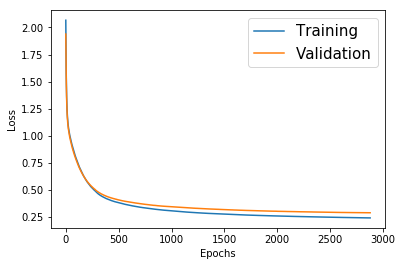

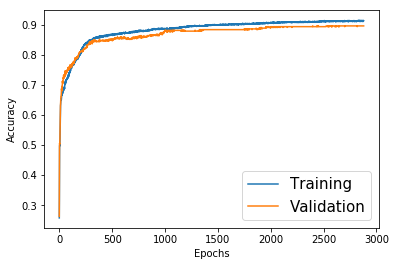

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
plt.savefig('loss with adam(hist4).fig', format='eps', dpi=1000)
plt.savefig('loss with adam(hist4).eps', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist4.history['acc'])
plt.plot(hist4.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})
plt.savefig('accuracy with adam(hist4).fig', format='eps', dpi=1000)
plt.savefig('accuracy with adam(hist4).eps', format='eps', dpi=1000)

In [60]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(56, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(40))
m.add(Activation('elu'))
m.add(Dense(35))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist2=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adamax,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist5=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1206 samples, validate on 403 samples
Epoch 1/3000
1206/1206 [==============================] - 2s 2ms/step - loss: 2.2002 - acc: 0.2222 - val_loss: 2.0647 - val_acc: 0.2605
Epoch 2/3000
1206/1206 [==============================] - 0s 124us/step - loss: 2.0274 - acc: 0.2960 - val_loss: 1.9182 - val_acc: 0.4144
Epoch 3/3000
1206/1206 [==============================] - 0s 121us/step - loss: 1.8608 - acc: 0.3897 - val_loss: 1.7023 - val_acc: 0.5012
Epoch 4/3000
1206/1206 [==============================] - 0s 123us/step - loss: 1.6412 - acc: 0.5025 - val_loss: 1.4958 - val_acc: 0.5087
Epoch 5/3000
1206/1206 [==============================] - 0s 124us/step - loss: 1.4673 - acc: 0.5050 - val_loss: 1.3610 - val_acc: 0.5409
Epoch 6/3000
1206/1206 [==============================] - 0s 133us/step - loss: 1.3335 - acc: 0.5721 - val_loss: 1.2458 - val_acc: 0.5757
Epoch 7/3000
1206/1206 [==============================] - 0s 124us/step - loss: 1.2259 - acc: 0.6302 - val_loss: 1.1381 - val_a

1206/1206 [==============================] - 0s 128us/step - loss: 0.2410 - acc: 0.9022 - val_loss: 0.4213 - val_acc: 0.8586
Epoch 00117: early stopping
Train on 1206 samples, validate on 403 samples
Epoch 1/3000
1206/1206 [==============================] - 2s 1ms/step - loss: 0.2214 - acc: 0.9129 - val_loss: 0.2526 - val_acc: 0.9082
Epoch 2/3000
1206/1206 [==============================] - 0s 121us/step - loss: 0.2048 - acc: 0.9187 - val_loss: 0.2598 - val_acc: 0.9007
Epoch 3/3000
1206/1206 [==============================] - 0s 115us/step - loss: 0.2048 - acc: 0.9171 - val_loss: 0.2600 - val_acc: 0.8983
Epoch 4/3000
1206/1206 [==============================] - 0s 119us/step - loss: 0.2025 - acc: 0.9187 - val_loss: 0.2504 - val_acc: 0.9082
Epoch 5/3000
1206/1206 [==============================] - 0s 119us/step - loss: 0.2052 - acc: 0.9138 - val_loss: 0.2503 - val_acc: 0.9107
Epoch 6/3000
1206/1206 [==============================] - 0s 120us/step - loss: 0.2041 - acc: 0.9196 - val_loss:

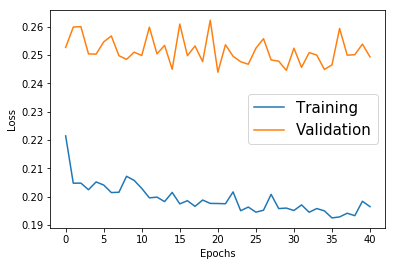

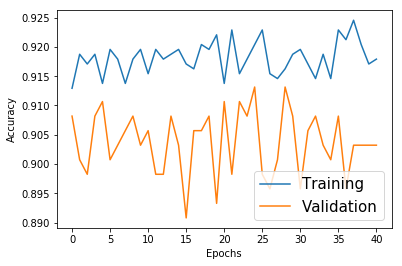

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
plt.savefig('loss with adam(hist5).fig', format='eps', dpi=1000)
plt.savefig('loss with adam(hist5).eps', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist5.history['acc'])
plt.plot(hist5.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})
plt.savefig('accuracy with adam(hist5).fig', format='eps', dpi=1000)
plt.savefig('accuracy with adam(hist5).eps', format='eps', dpi=1000)

In [62]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adad,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist6=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1206 samples, validate on 403 samples
Epoch 1/3000
1206/1206 [==============================] - 2s 2ms/step - loss: 2.1277 - acc: 0.2604 - val_loss: 2.0062 - val_acc: 0.2605
Epoch 2/3000
1206/1206 [==============================] - 0s 118us/step - loss: 1.9777 - acc: 0.2612 - val_loss: 1.8731 - val_acc: 0.2730
Epoch 3/3000
1206/1206 [==============================] - 0s 127us/step - loss: 1.8517 - acc: 0.3698 - val_loss: 1.7198 - val_acc: 0.4789
Epoch 4/3000
1206/1206 [==============================] - 0s 129us/step - loss: 1.6656 - acc: 0.4884 - val_loss: 1.5168 - val_acc: 0.5261
Epoch 5/3000
1206/1206 [==============================] - 0s 129us/step - loss: 1.4597 - acc: 0.5340 - val_loss: 1.3576 - val_acc: 0.5608
Epoch 6/3000
1206/1206 [==============================] - 0s 128us/step - loss: 1.3144 - acc: 0.5995 - val_loss: 1.2412 - val_acc: 0.6427
Epoch 7/3000
1206/1206 [==============================] - 0s 167us/step - loss: 1.2233 - acc: 0.6542 - val_loss: 1.1716 - val_a

Epoch 118/3000
1206/1206 [==============================] - 0s 118us/step - loss: 0.2817 - acc: 0.8972 - val_loss: 0.3042 - val_acc: 0.8883
Epoch 119/3000
1206/1206 [==============================] - 0s 124us/step - loss: 0.2798 - acc: 0.8972 - val_loss: 0.3076 - val_acc: 0.8933
Epoch 120/3000
1206/1206 [==============================] - 0s 128us/step - loss: 0.2782 - acc: 0.8955 - val_loss: 0.3075 - val_acc: 0.8883
Epoch 121/3000
1206/1206 [==============================] - 0s 116us/step - loss: 0.2758 - acc: 0.8964 - val_loss: 0.3130 - val_acc: 0.8809
Epoch 122/3000
1206/1206 [==============================] - 0s 123us/step - loss: 0.2783 - acc: 0.8988 - val_loss: 0.3005 - val_acc: 0.8883
Epoch 123/3000
1206/1206 [==============================] - 0s 124us/step - loss: 0.2743 - acc: 0.9005 - val_loss: 0.3017 - val_acc: 0.8883
Epoch 124/3000
1206/1206 [==============================] - 0s 99us/step - loss: 0.2734 - acc: 0.8997 - val_loss: 0.3074 - val_acc: 0.8933
Epoch 125/3000
1206/1

1206/1206 [==============================] - 0s 119us/step - loss: 0.2268 - acc: 0.9154 - val_loss: 0.2726 - val_acc: 0.9057
Epoch 235/3000
1206/1206 [==============================] - 0s 119us/step - loss: 0.2266 - acc: 0.9113 - val_loss: 0.2706 - val_acc: 0.8983
Epoch 236/3000
1206/1206 [==============================] - 0s 98us/step - loss: 0.2273 - acc: 0.9096 - val_loss: 0.2685 - val_acc: 0.9057
Epoch 237/3000
1206/1206 [==============================] - 0s 123us/step - loss: 0.2267 - acc: 0.9113 - val_loss: 0.2790 - val_acc: 0.8908
Epoch 238/3000
1206/1206 [==============================] - 0s 119us/step - loss: 0.2241 - acc: 0.9187 - val_loss: 0.2886 - val_acc: 0.8859
Epoch 239/3000
1206/1206 [==============================] - 0s 123us/step - loss: 0.2258 - acc: 0.9138 - val_loss: 0.2828 - val_acc: 0.8958
Epoch 240/3000
1206/1206 [==============================] - 0s 128us/step - loss: 0.2248 - acc: 0.9129 - val_loss: 0.2675 - val_acc: 0.9032
Epoch 241/3000
1206/1206 [==========

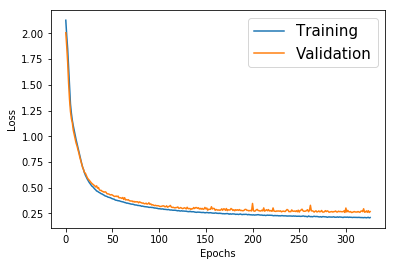

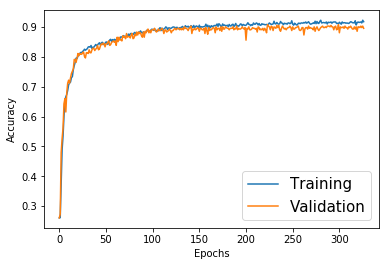

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
plt.savefig('loss with adam(hist6).fig', format='eps', dpi=1000)
plt.savefig('loss with adam(hist6).eps', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist6.history['acc'])
plt.plot(hist6.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})
plt.savefig('accuracy with adam(hist6).fig', format='eps', dpi=1000)
plt.savefig('accuracy with adam(hist6).eps', format='eps', dpi=1000)

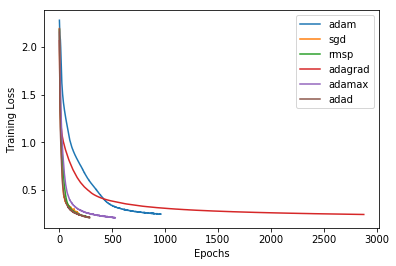

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.plot(hist.history['loss'])
plt.plot(hist2.history['loss'])
plt.plot(hist3.history['loss'])
plt.plot(hist4.history['loss'])
plt.plot(hist5.history['loss'])
plt.plot(hist6.history['loss'])
plt.savefig('loss with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('loss with diff. optimizers.eps', format='eps', dpi=1000)
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])

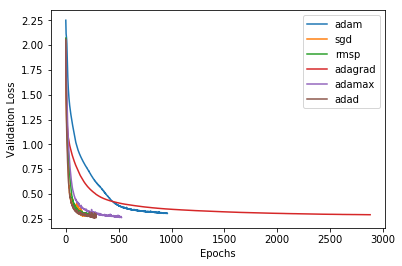

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
#plt.plot(hist1.history['loss'])
plt.plot(hist.history['val_loss'])
#plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
#plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
#plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
#plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
#plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])
plt.savefig('Validation loss with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('Validation loss with diff. optimizers.eps', format='eps', dpi=1000)

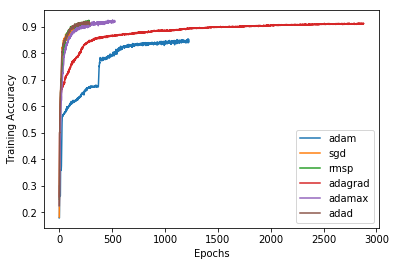

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.plot(hist1.history['acc'])
#plt.plot(hist1.history['val_loss'])
plt.plot(hist2.history['acc'])
#plt.plot(hist2.history['val_loss'])
plt.plot(hist3.history['acc'])
#plt.plot(hist3.history['val_loss'])
plt.plot(hist4.history['acc'])
#plt.plot(hist4.history['val_loss'])
plt.plot(hist5.history['acc'])
#plt.plot(hist5.history['val_loss'])
plt.plot(hist6.history['acc'])
#plt.plot(hist6.history['val_loss'])
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])
plt.savefig('training accuracy with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('training accuracy with diff. optimizers.eps', format='eps', dpi=1000)

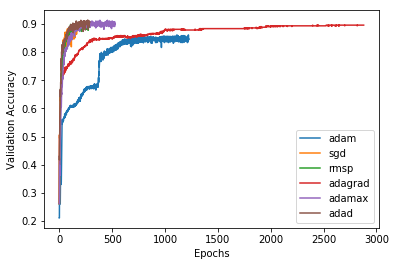

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.plot(hist1.history['val_acc'])
plt.plot(hist2.history['val_acc'])
plt.plot(hist3.history['val_acc'])
plt.plot(hist4.history['val_acc'])
plt.plot(hist5.history['val_acc'])
plt.plot(hist6.history['val_acc'])
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])
plt.savefig('validation accuracy with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('validation accuracy with diff. optimizers.eps', format='eps', dpi=1000)